In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv(r'..\data\03_processed\01_preprocessed.csv')
df.head()

,ID,Adres e-mail,Nazwa,"Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.",W jaki sposób chcesz uczestniczyć w Community?,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,...,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR,"Jeżeli pominięto branżę, na której się znasz dopisz ją:"
0,1,anonymous,NaN,"Projekt ""data"" będący mobilną stacją benzynową...",Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,...,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,NaN
1,2,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,3,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,...,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,NaN
3,4,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,NaN
4,5,anonymous,NaN,Wirtualni doradcy wpływający na pozytywną zmia...,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,LawTech


In [31]:
print(df.dtypes)

ID                                                                               int64
Adres e-mail                                                                    object
Nazwa                                                                          float64
W jaki sposób chcesz uczestniczyć w Community?                                  object
Programming: R                                                                 float64
Programming: Python                                                            float64
Programming: Bash                                                              float64
Version Control: GIT                                                           float64
Containers: Docker                                                             float64
CLI: (np. Bash, PowerShell, CMD)                                               float64
Front End: (HTML, JavaScript, CSS)                                             float64
Databases: SQL                             

In [4]:
columns_to_drop = ['Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.', 'Jeżeli pominięto branżę, na której się znasz dopisz ją:']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.head()

,ID,Adres e-mail,Nazwa,W jaki sposób chcesz uczestniczyć w Community?,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)",...,"Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:",FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
0,1,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,4.0,...,NaN,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,anonymous,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,anonymous,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,Excel,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,NaN,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [6]:
columns_not_for_analysis = ['ID', 'Adres e-mail', 'Nazwa', 'W jaki sposób chcesz uczestniczyć w Community?', 'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:']
df1 = df.drop(columns=columns_not_for_analysis)

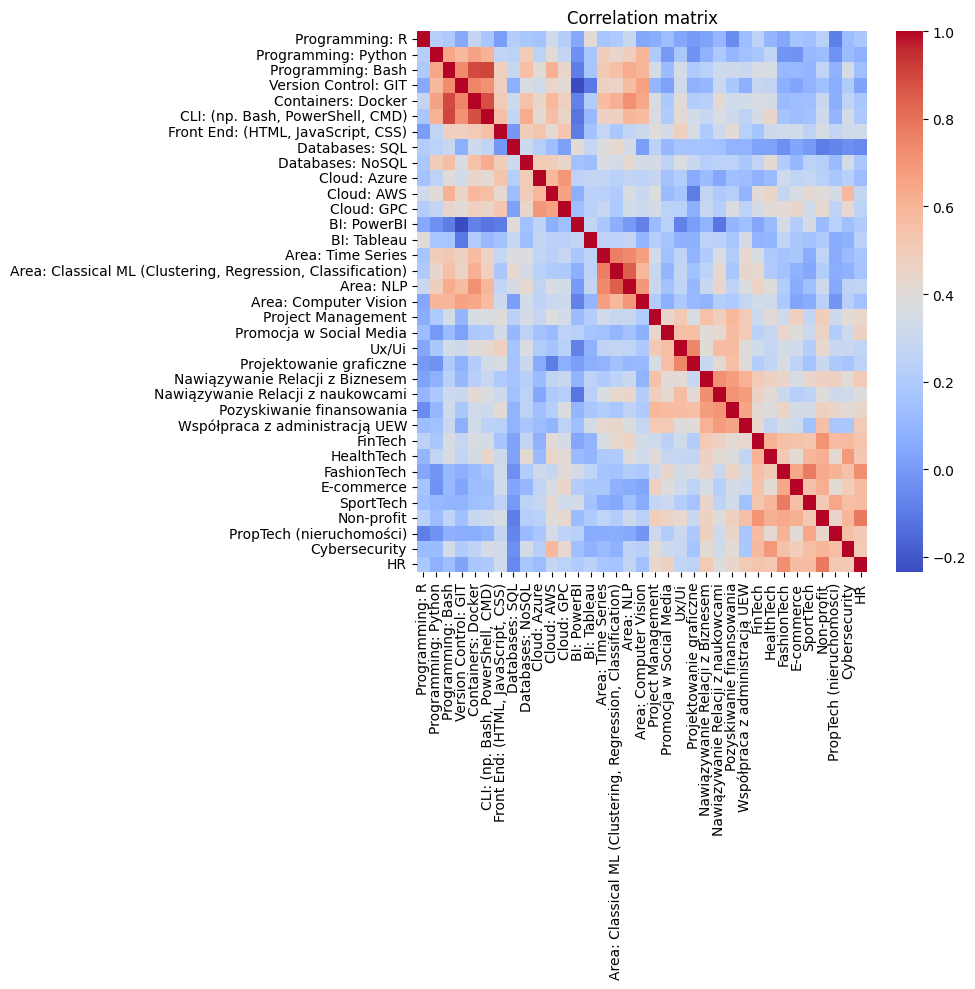

In [7]:
correlation_matrix = df1.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

It hard to read so it should be split

In [8]:
programming = ['Programming: R', 'Programming: Python', 'Programming: Bash', 'Version Control: GIT'
               ,'CLI: (np. Bash, PowerShell, CMD)', 'Front End: (HTML, JavaScript, CSS)']
machine_learning = ['Containers: Docker','Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision']
databases = ['Databases: SQL', 'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau']
soft = ['Project Management', 'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
        'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 'Współpraca z administracją UEW']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']


In [9]:
cm1 = df[programming].corr()

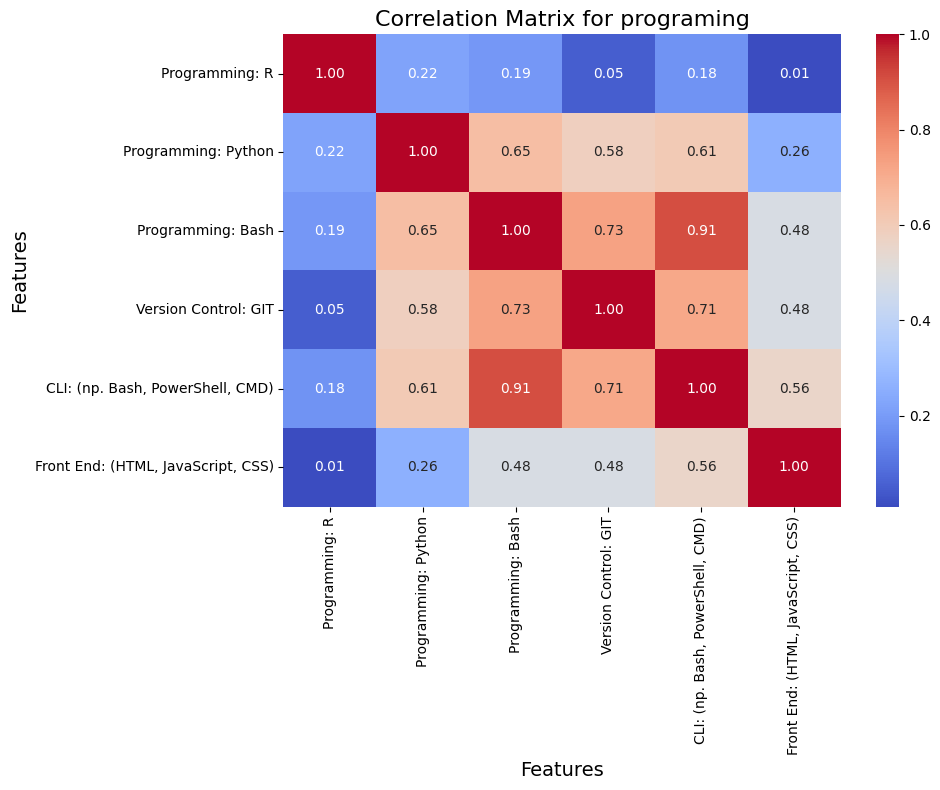

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm1, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix for programing', fontsize=16)


plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)


plt.tight_layout()
plt.show()

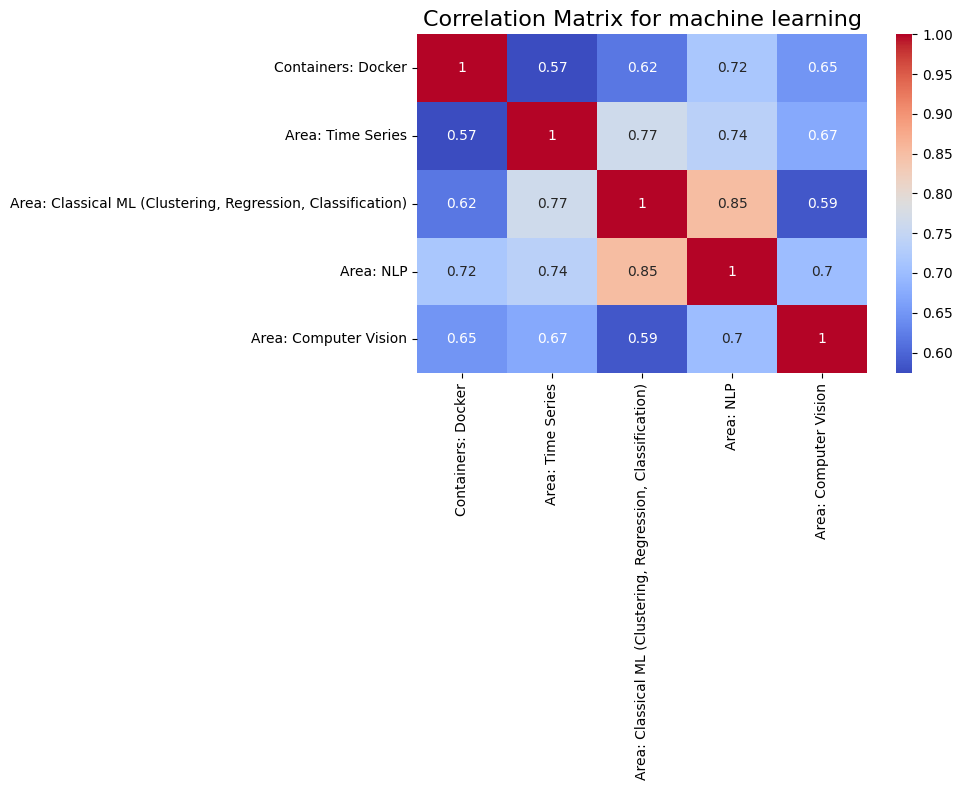

In [11]:
cm2 = df[machine_learning].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, cmap='coolwarm', annot=True, )
plt.title('Correlation Matrix for machine learning', fontsize=16)

plt.tight_layout()
plt.show()

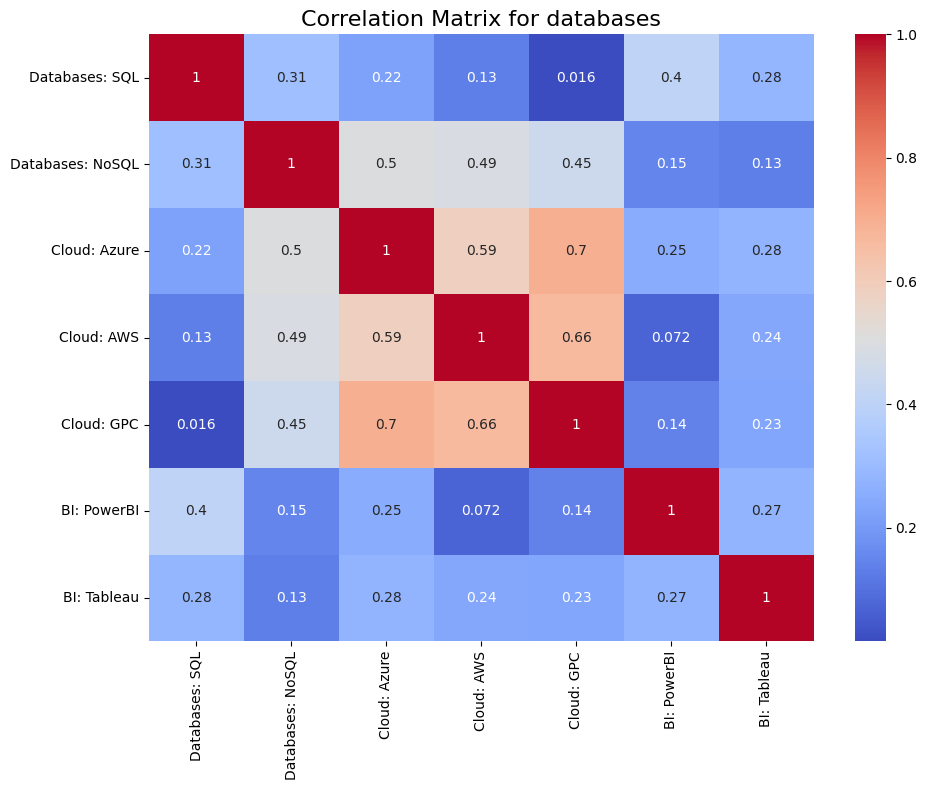

In [12]:
cm3 = df[databases].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cm3, cmap='coolwarm', annot=True, )
plt.title('Correlation Matrix for databases', fontsize=16)

plt.tight_layout()
plt.show()

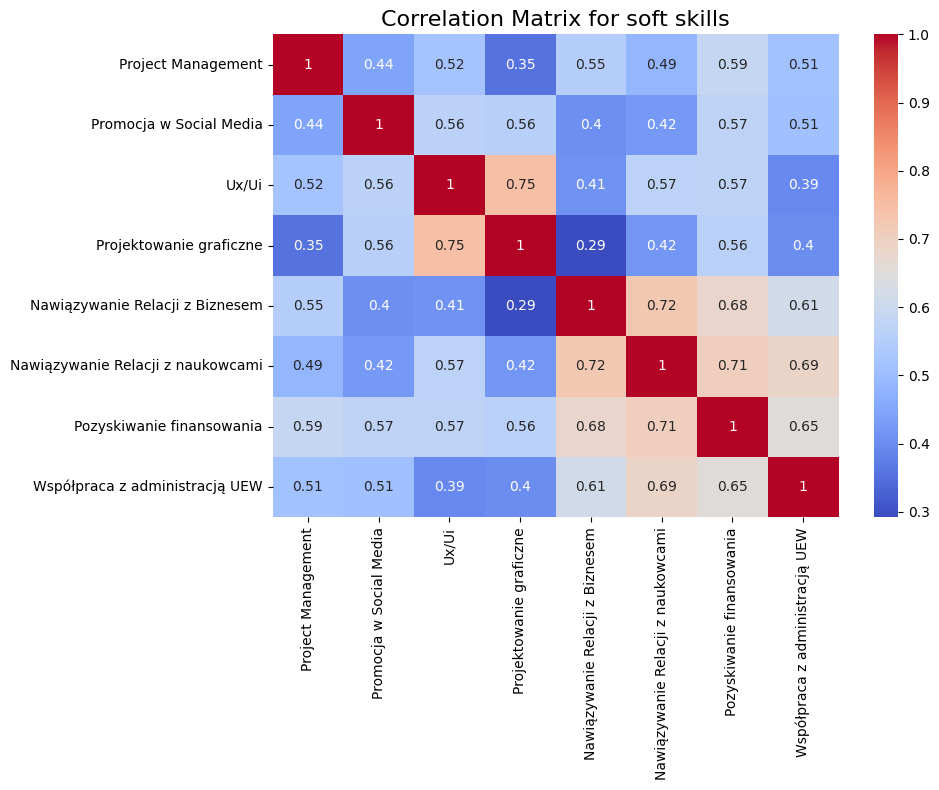

In [13]:
cm4 = df[soft].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cm4, cmap='coolwarm', annot=True, )
plt.title('Correlation Matrix for soft skills', fontsize=16)

plt.tight_layout()
plt.show()

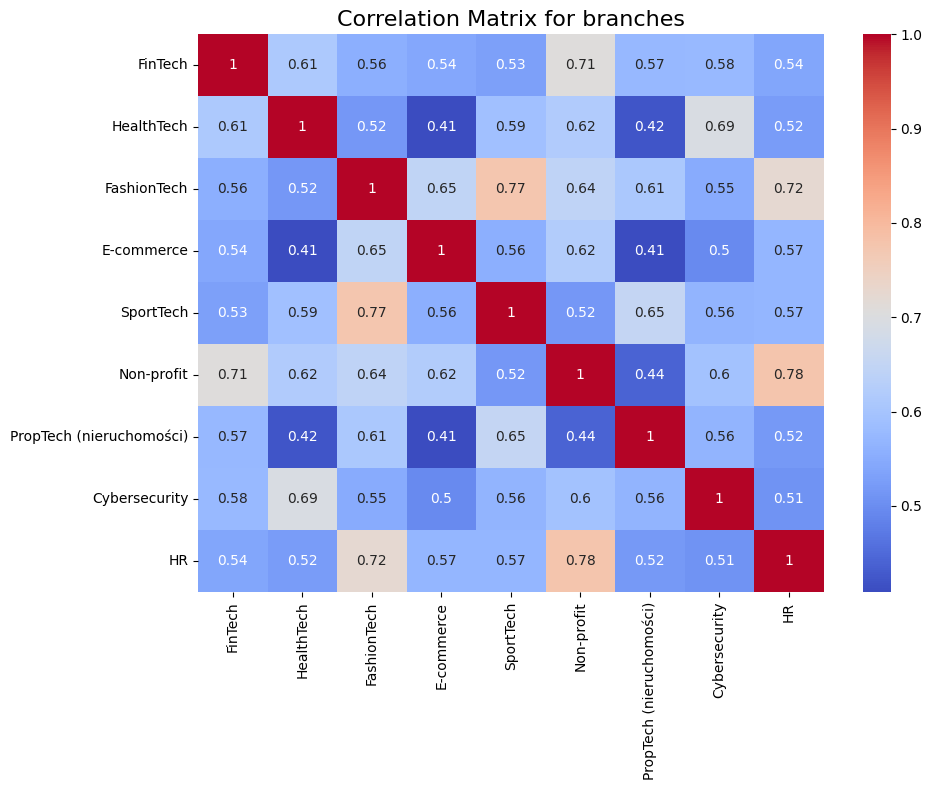

In [14]:
cm5 = df[branches].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cm5, cmap='coolwarm', annot=True, )
plt.title('Correlation Matrix for branches', fontsize=16)

plt.tight_layout()
plt.show()

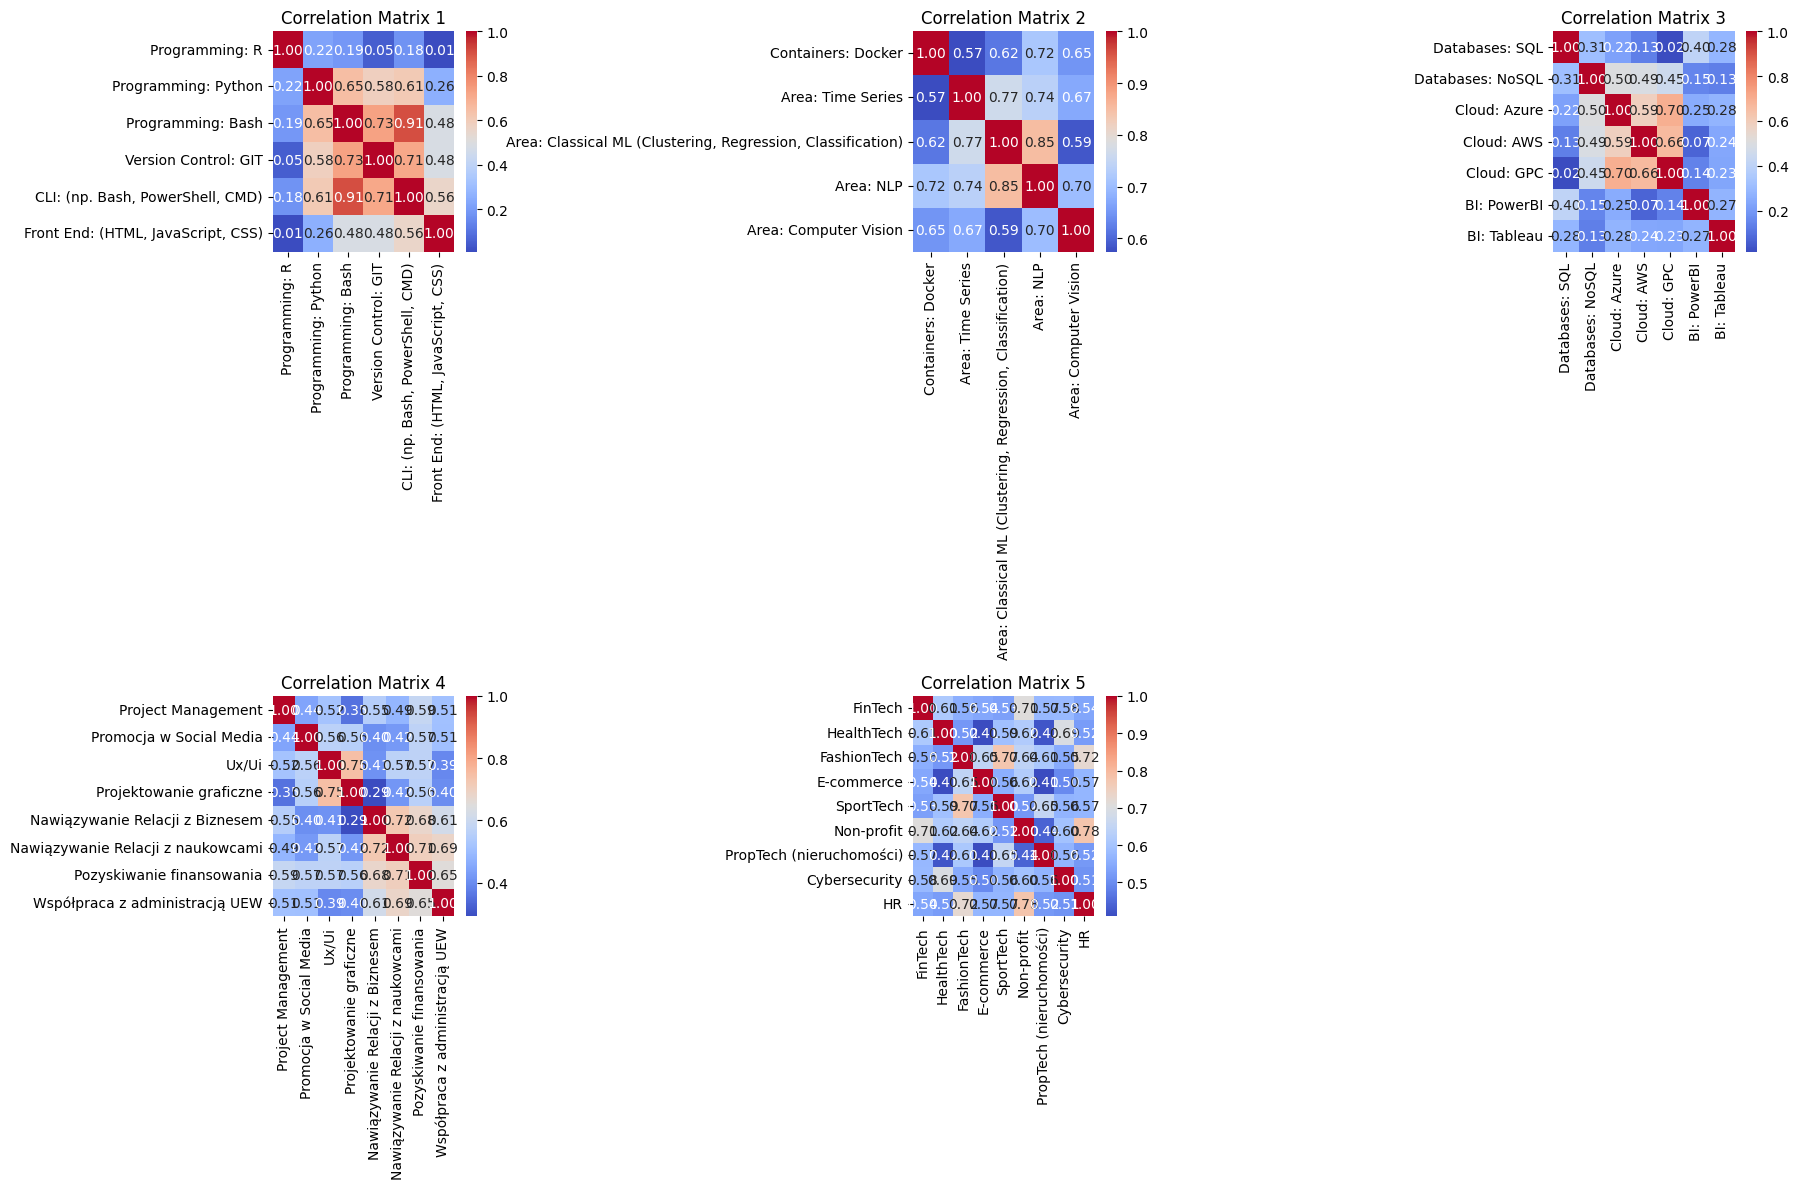

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

sns.heatmap(cm1, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix 1')

sns.heatmap(cm2, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix 2')

sns.heatmap(cm3, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0, 2])
axes[0, 2].set_title('Correlation Matrix 3')

sns.heatmap(cm4, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix 4')

sns.heatmap(cm5, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix 5')

# Hide the empty subplot (if any)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Może to jest jakiś pomysł 

In [63]:
df['Programming: Python'].value_counts()

Programming: Python
2    28
3    24
4     6
1     1
5     0
Name: count, dtype: int64

# Variables distributions

In [47]:
programming = ['Programming: R', 'Programming: Python', 'Programming: Bash', 'Version Control: GIT'
               ,'CLI: (np. Bash, PowerShell, CMD)', 'Front End: (HTML, JavaScript, CSS)']
machine_learning = ['Containers: Docker','Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision']
databases = ['Databases: SQL', 'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau']
soft = ['Project Management', 'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
        'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 'Współpraca z administracją UEW']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']


rating_scale = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

for column in programming, machine_learning, databases, soft, branches:
    df[column] = df[column].astype(rating_scale)

## ZMIANY

### Dystrybucja zmiennych na histogramach,kosmetyczne rzeczy do poprawienia

### Dla każdej listy to zrobic zbadac trendy 
kurwa nikt nie dał odpowiedzi 5 XDDDDDDD


### Decyzja jaki typ danych zrobic jak to 1-5 skala 


### Złapać dziwne rekordy

### Jak ktos dal ocene ze nie umie to wtedy brak umiejki


### Policzyc ile osob chce brac aktywnie udzial w community 

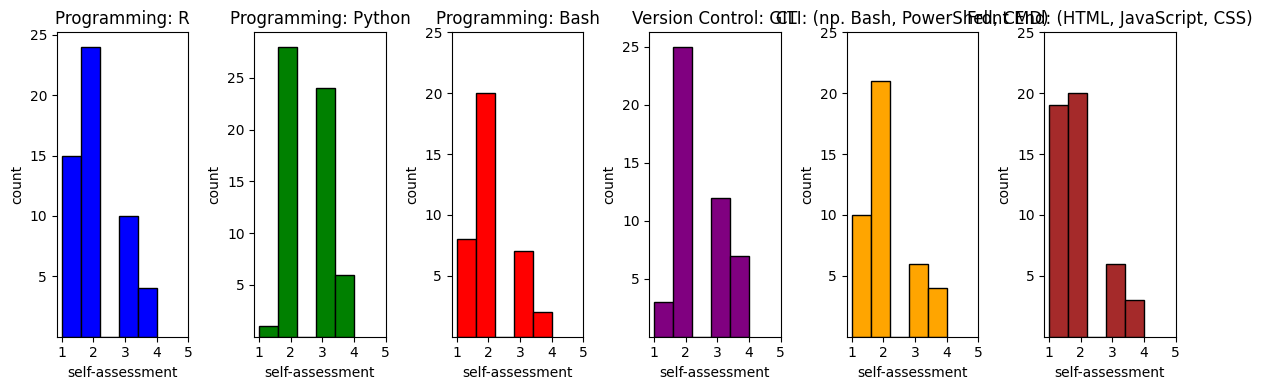

In [35]:
##WERSJA 1


fig, axes = plt.subplots(nrows=1, ncols=len(programming), figsize=(12, 4))

# Iterate over each column and create a histogram
for i, column in enumerate(programming):
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
    ax = axes[i]
    ax.hist(df[column], bins=5, color= colors[i], edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('self-assessment')
    ax.set_ylabel('count')
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xticklabels([1, 2, 3, 4, 5])
    ax.set_yticks([5, 10, 15, 20, 25])
    
    

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

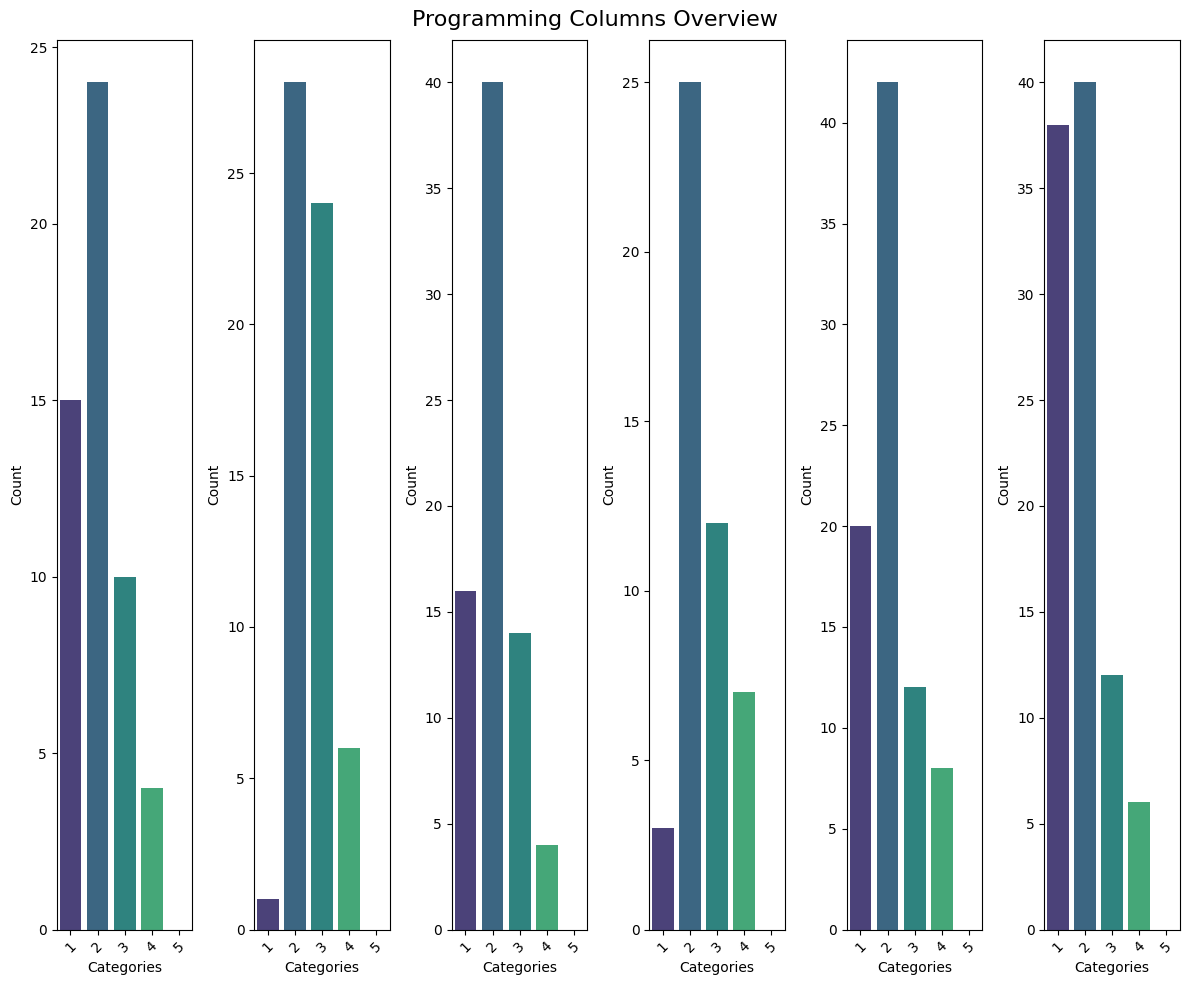

In [55]:
#WERSJA 2

fig, axes = plt.subplots(nrows=1, ncols=len(programming), figsize=(12, 10))


#obrocic te tytuly 
#Ogarnac ilosc obserwacji na kazdym pytaniu

# Iterate over each column and create a count plot
for i, column in enumerate(programming):
    ax = axes[i]
    sns.countplot(x=df[column], ax=ax, palette='viridis')
    
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Adjust spacing between subplots
fig.suptitle('Programming Columns Overview', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()





#Ogarnac ilosc obserwacji na kazdym pytaniu

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



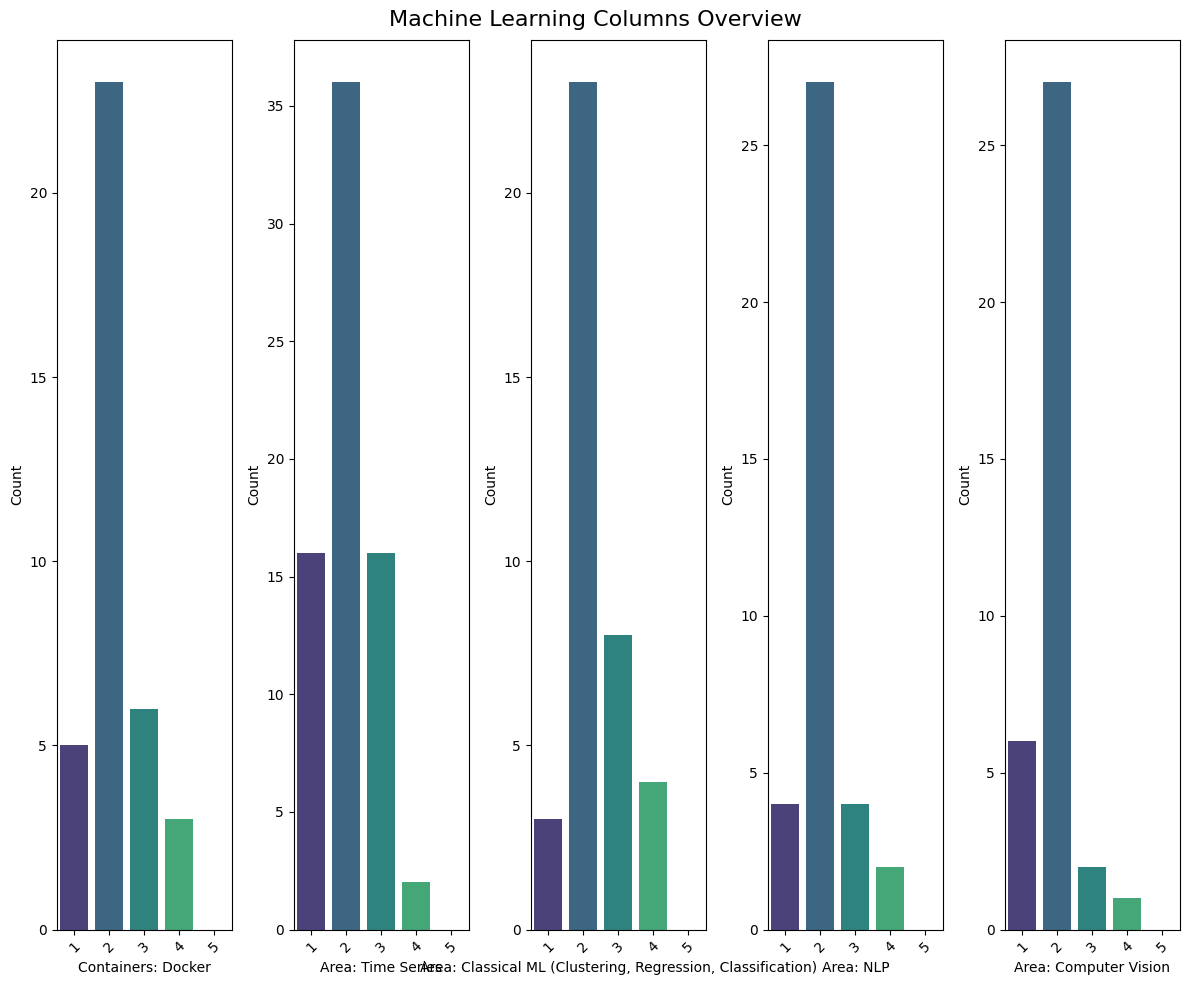

In [56]:
#WERSJA 2

fig, axes = plt.subplots(nrows=1, ncols=len(machine_learning), figsize=(12, 10))



# Iterate over each column and create a count plot
for i, column in enumerate(machine_learning):
    ax = axes[i]
    sns.countplot(x=df[column], ax=ax, palette='viridis')
    
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Adjust spacing between subplots
fig.suptitle('Machine Learning Columns Overview', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

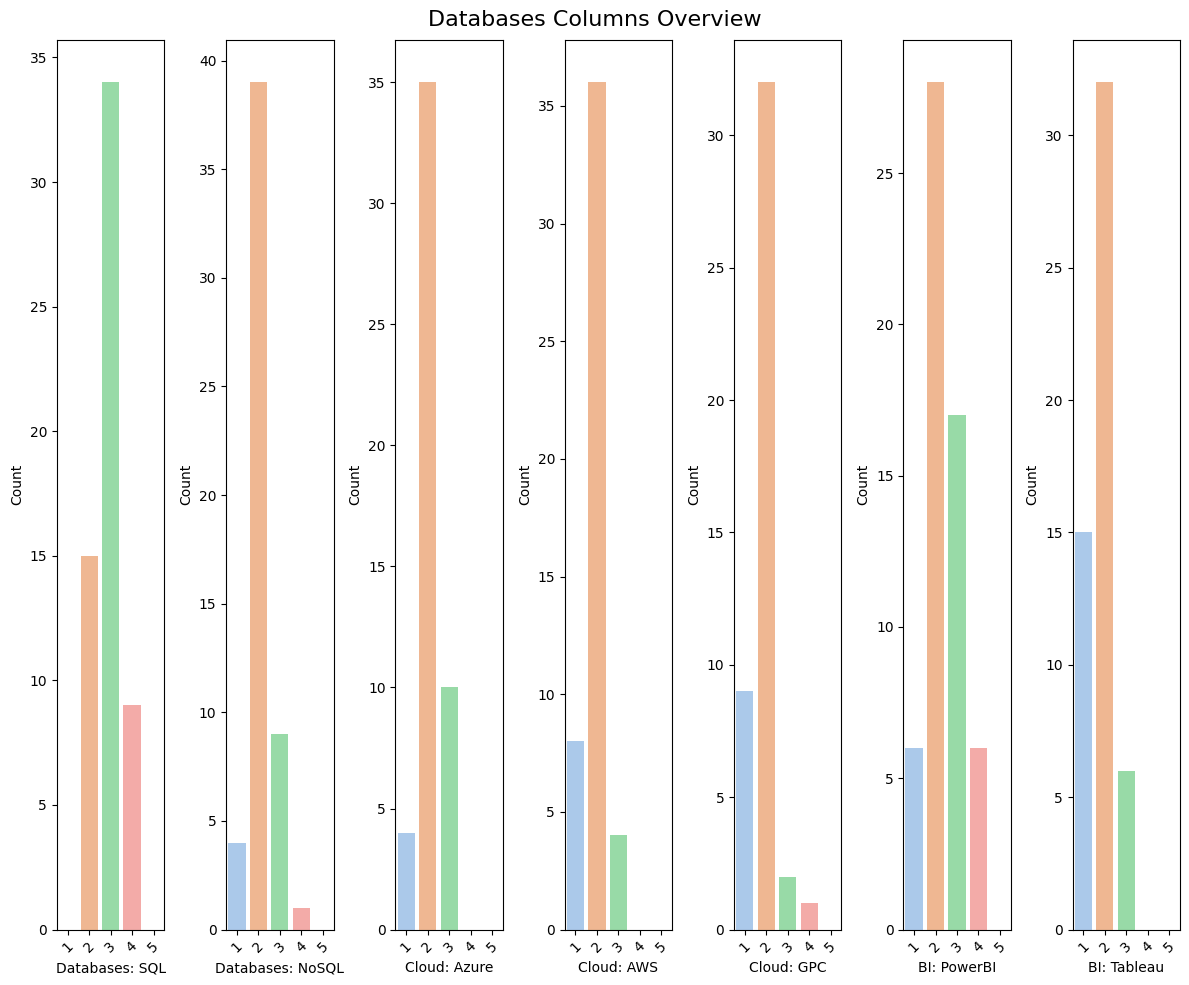

In [57]:
#WERSJA 2

fig, axes = plt.subplots(nrows=1, ncols=len(databases), figsize=(12, 10))



# Iterate over each column and create a count plot
for i, column in enumerate(databases):
    ax = axes[i]
    sns.countplot(x=df[column], ax=ax, palette='pastel')
    
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Adjust spacing between subplots
fig.suptitle('Databases Columns Overview', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

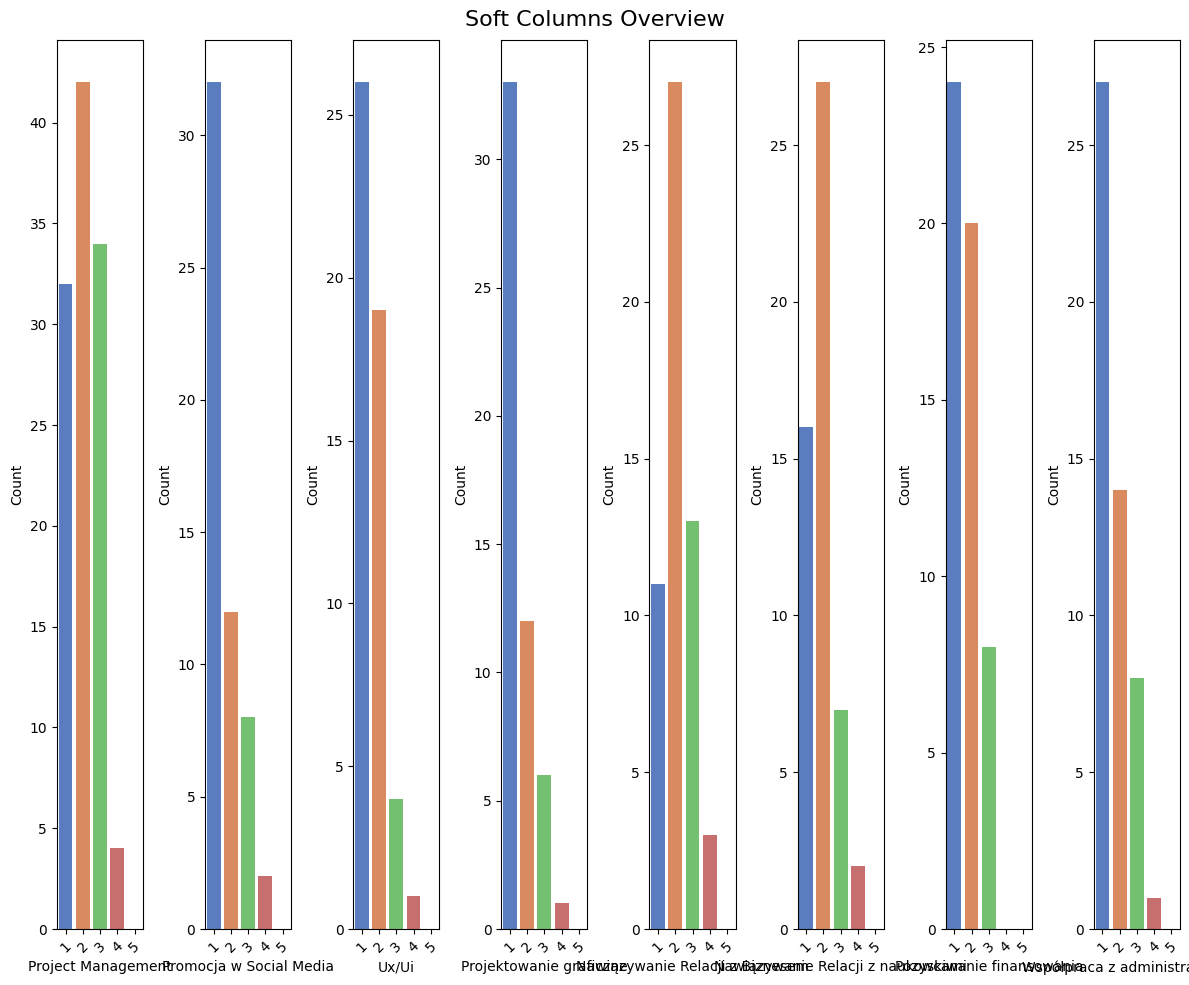

In [58]:
#WERSJA 2

fig, axes = plt.subplots(nrows=1, ncols=len(soft), figsize=(12, 10))



# Iterate over each column and create a count plot
for i, column in enumerate(soft):
    ax = axes[i]
    sns.countplot(x=df[column], ax=ax, palette='muted')
    
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Adjust spacing between subplots
fig.suptitle('Soft Columns Overview', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

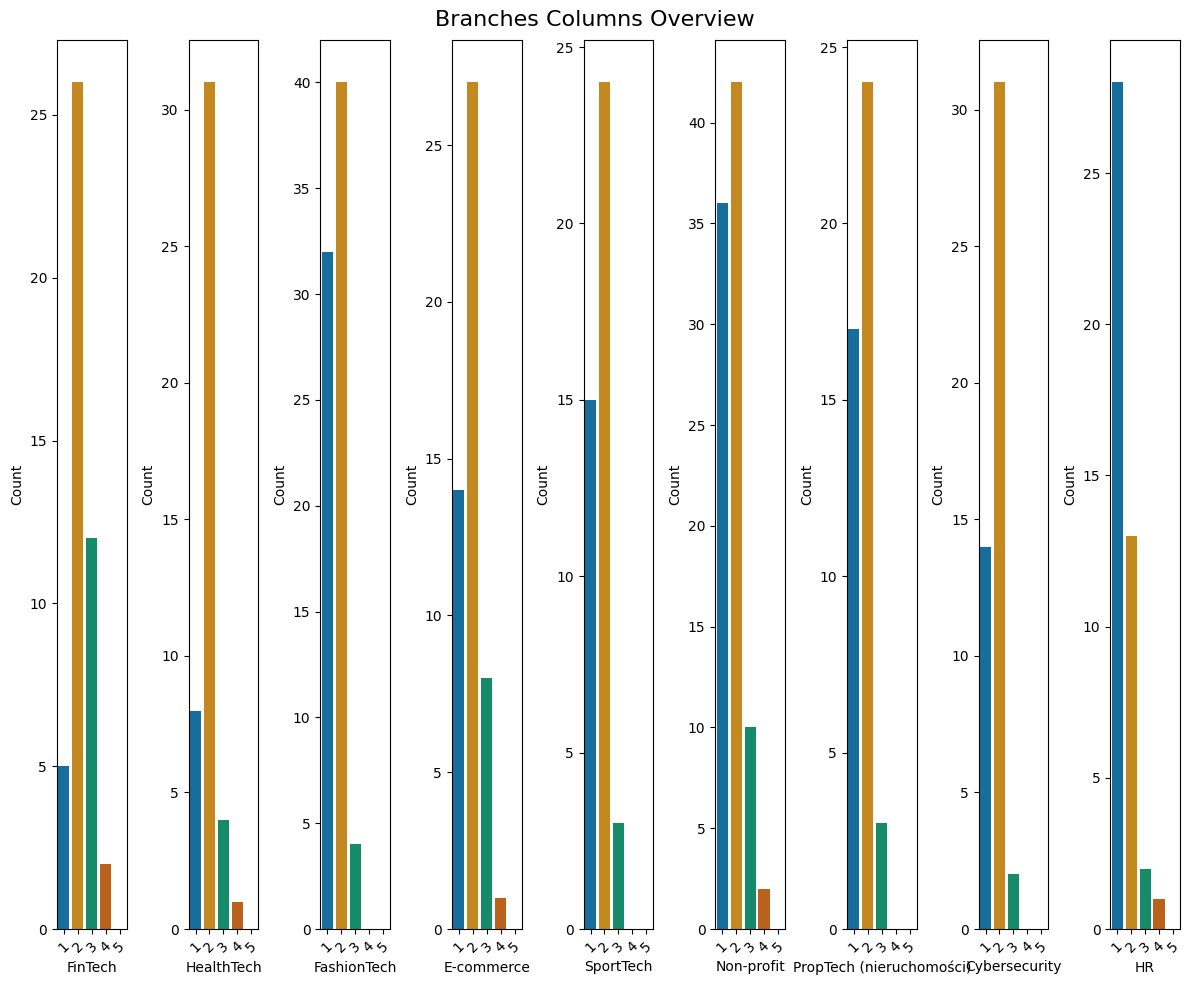

In [59]:
#WERSJA 2

fig, axes = plt.subplots(nrows=1, ncols=len(branches), figsize=(12, 10))



# Iterate over each column and create a count plot
for i, column in enumerate(branches):
    ax = axes[i]
    sns.countplot(x=df[column], ax=ax, palette='colorblind')
    
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Adjust spacing between subplots
fig.suptitle('Branches Columns Overview', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()